# Snow depth timeseries of treatment plots from WY2023
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

Open the cleaned pickle files

In [2]:
# forest and gap sites 
CNF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF21.pkl", "rb"))
CNG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG21.pkl", "rb"))
CSF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF21.pkl", "rb"))
CSG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG21.pkl", "rb"))

CNF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF23.pkl", "rb"))
CNG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG23.pkl", "rb"))
CSF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF23.pkl", "rb"))
CSG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG23.pkl", "rb"))

# the other post treatment sites 
CN20 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN20.pkl", "rb"))
CN50 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN50.pkl", "rb"))
CN60 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN60.pkl", "rb"))
CN70 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN70.pkl", "rb"))

CS20  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS20.pkl", "rb"))
CS50  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS50.pkl", "rb"))
CS60  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS60.pkl", "rb"))
CS120 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS120.pkl", "rb"))

In [3]:
# now the SDD files too
SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

Below is the normalization code from **4_normalize_snowdepth** notebook\
keep it here for now incase I want to plot the normalized snow depth too. 

In [4]:
# normalized to the forest side (f) vs the gap side (g) on the same slope as the treatment sites
# north sites 
CN20['normf'] = CN20['Median_depth'] - CNF23['Median_depth']
CN20['normg'] = CN20['Median_depth'] - CNG23['Median_depth']

CN50['normf'] = CN50['Median_depth'] - CNF23['Median_depth']
CN50['normg'] = CN50['Median_depth'] - CNG23['Median_depth']

CN60['normf'] = CN60['Median_depth'] - CNF23['Median_depth']
CN60['normg'] = CN60['Median_depth'] - CNG23['Median_depth']

CN70['normf'] = CN70['Median_depth'] - CNF23['Median_depth']
CN70['normg'] = CN70['Median_depth'] - CNG23['Median_depth']

# south sites
CS20['normf'] = CS20['Median_depth'] - CSF23['Median_depth']
CS20['normg'] = CS20['Median_depth'] - CSG23['Median_depth']

CS50['normf'] = CS50['Median_depth'] - CSF23['Median_depth']
CS50['normg'] = CS50['Median_depth'] - CSG23['Median_depth']

CS60['normf'] = CS60['Median_depth'] - CSF23['Median_depth']
CS60['normg'] = CS60['Median_depth'] - CSG23['Median_depth']

CS120['normf'] = CS120['Median_depth'] - CSF23['Median_depth']
CS120['normg'] = CS120['Median_depth'] - CSG23['Median_depth']

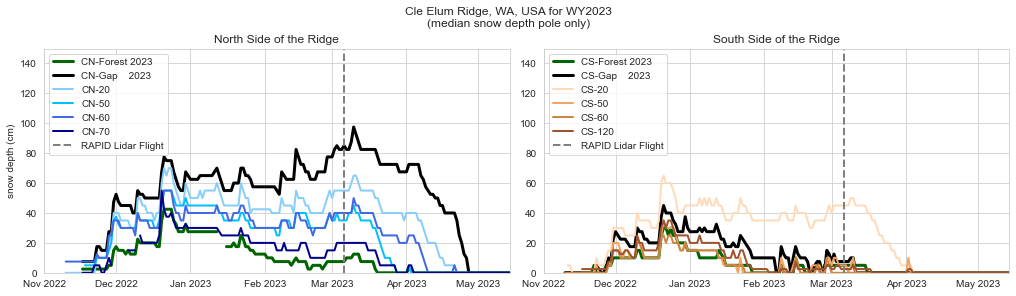

In [5]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Plot the fill between for all the sites too

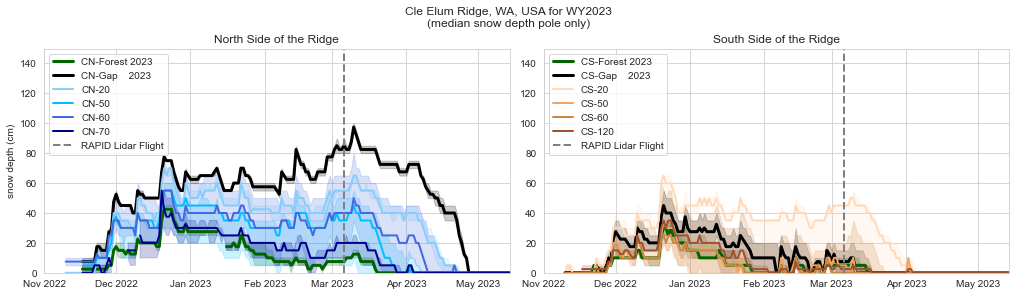

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = 'lightskyblue', alpha = alpha)
ax[0].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = 'deepskyblue', alpha = alpha)
ax[0].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = 'royalblue', alpha = alpha)
ax[0].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = 'darkblue', alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = 'peachpuff', alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = 'sandybrown', alpha = alpha)
ax[1].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = 'peru', alpha = alpha)
ax[1].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = 'sienna', alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Plot the same BAFs on the north and south together to compare 

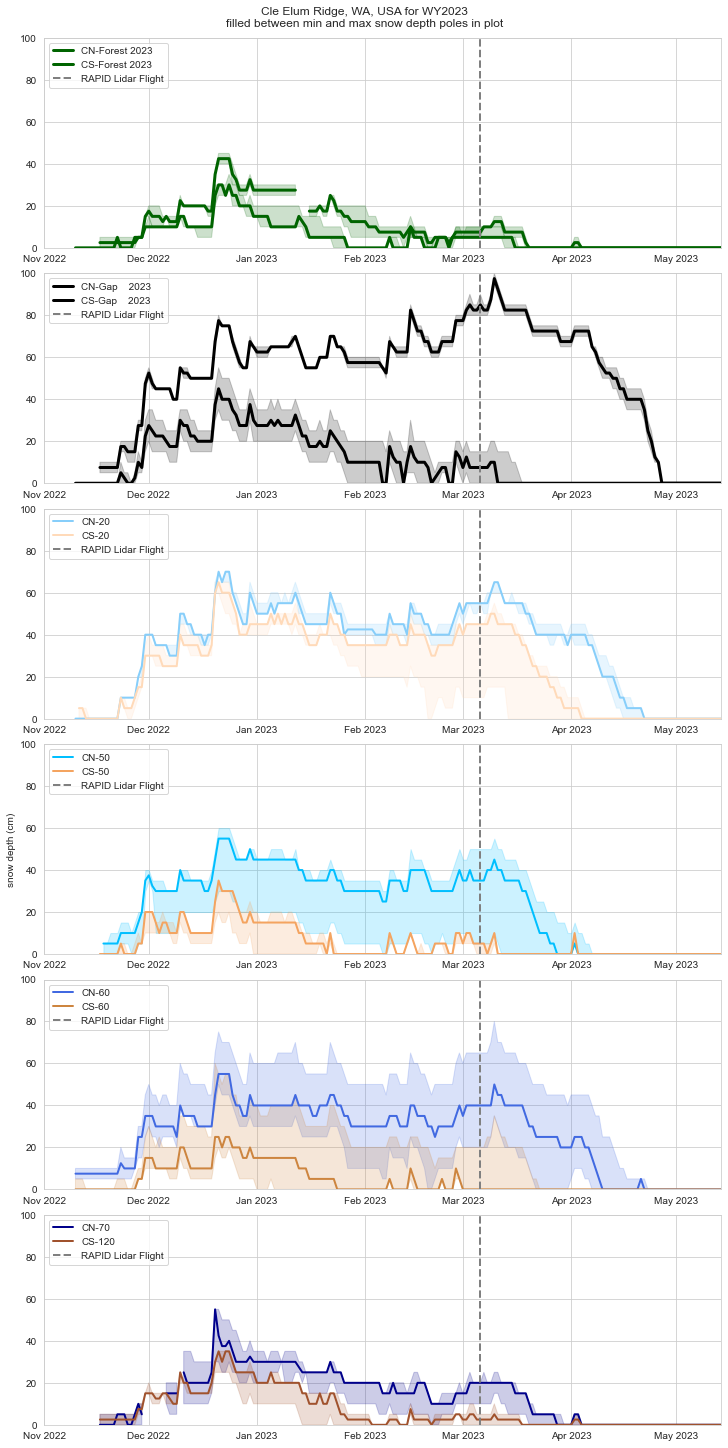

In [7]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[2].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = 'lightskyblue', alpha = alpha)
ax[3].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = 'deepskyblue', alpha = alpha)
ax[4].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = 'royalblue', alpha = alpha)
ax[5].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = 'darkblue', alpha = alpha)

ax[2].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = 'peachpuff', alpha = alpha)
ax[3].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = 'sandybrown', alpha = alpha)
ax[4].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = 'peru', alpha = alpha)
ax[5].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = 'sienna', alpha = alpha)

# add the other treatment sites for the north and south sides
ax[2].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[3].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[4].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[5].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[2].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[3].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[4].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[5].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[3].set_ylabel("snow depth (cm)")
plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between min and max snow depth poles in plot")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

The code above uses the previous colors, but I am going to\
make all the north and south sides match for simplicity 

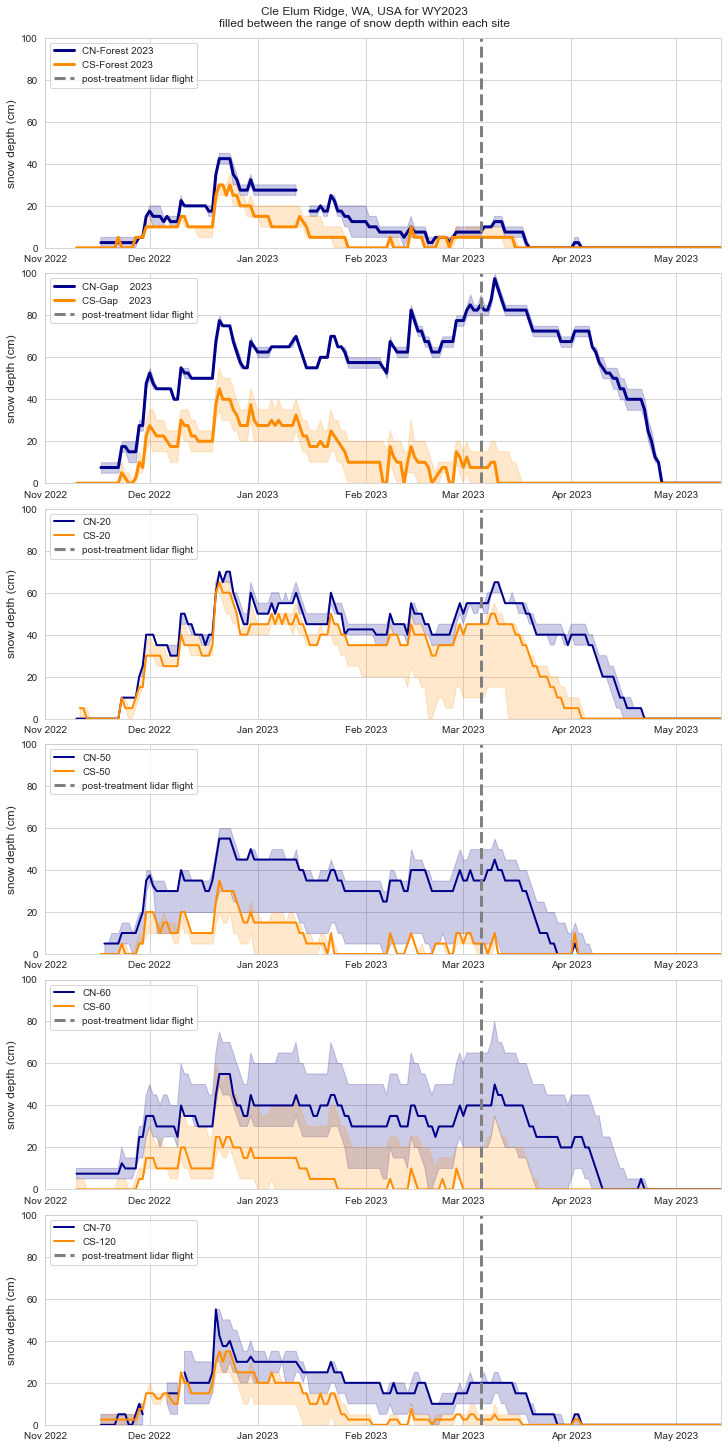

In [18]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[2].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[2].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[5].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[2].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[3].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[4].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[5].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[2].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[3].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[4].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[5].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

Same one as above, except with the gap at the top, then BAF 20,50,60,120, then the forest site

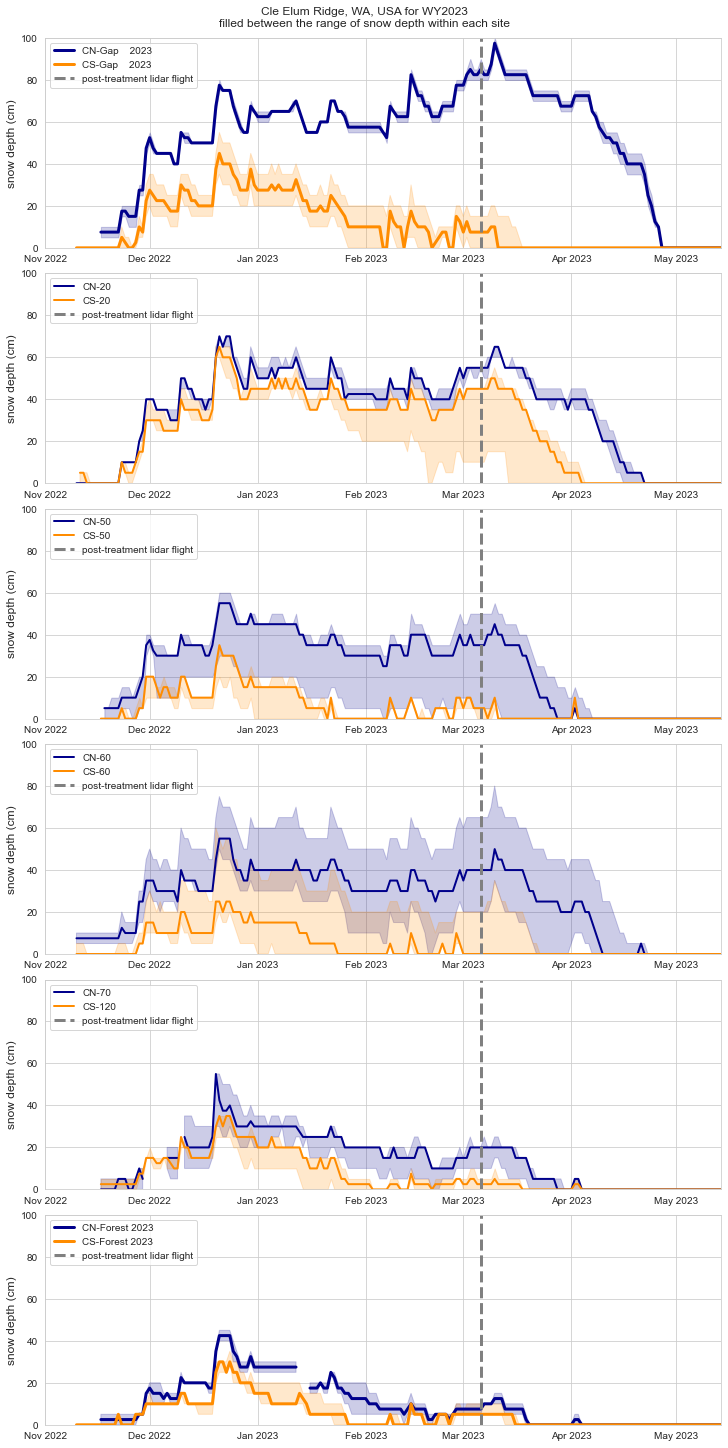

In [19]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

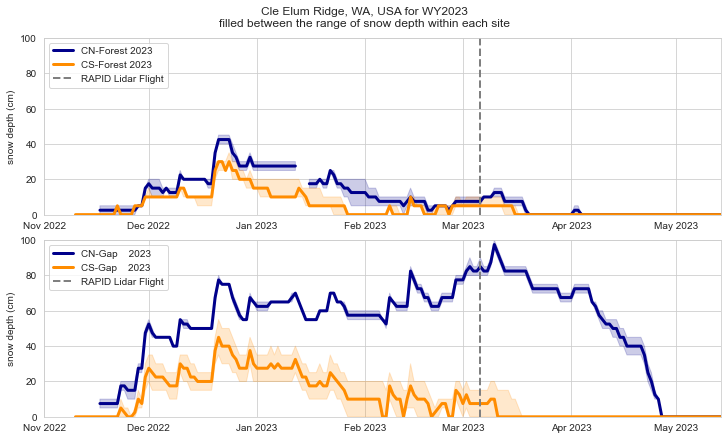

In [10]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")
fig, ax = plt.subplots(2,1,figsize = (10,6), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()

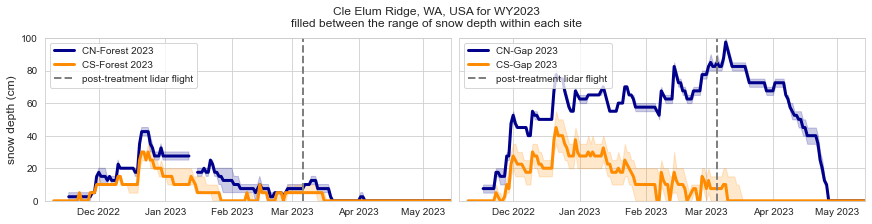

In [34]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2,figsize = (12,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap 2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap 2023", linewidth=3)

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()

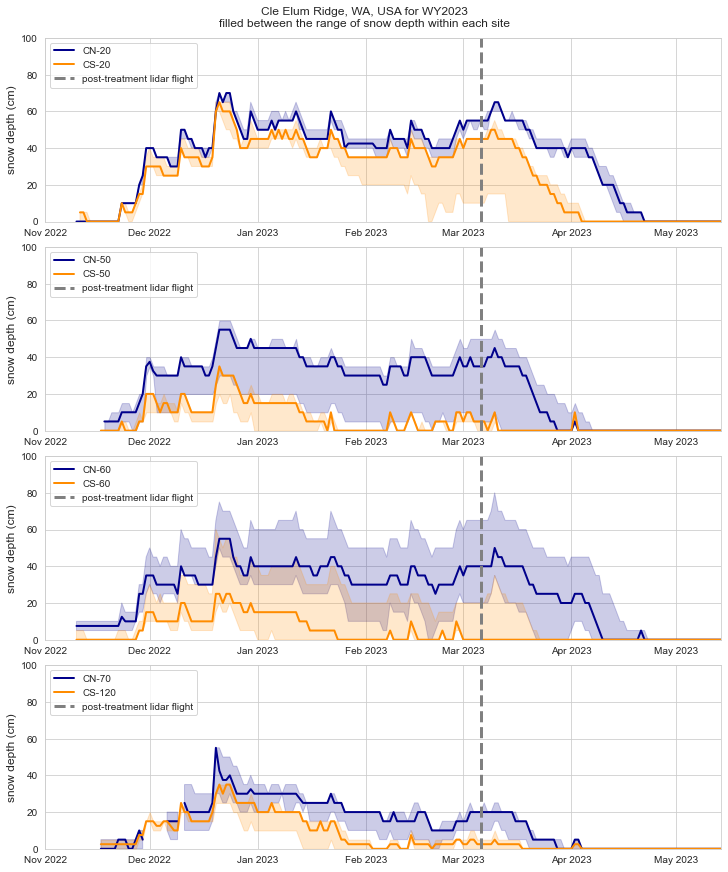

In [20]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(4,1,figsize = (10,12), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# # CONTROL SITES
# # fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
# ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
# ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# # then just plot the median for the forest and gap sites
# ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
# ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
# ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
# ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

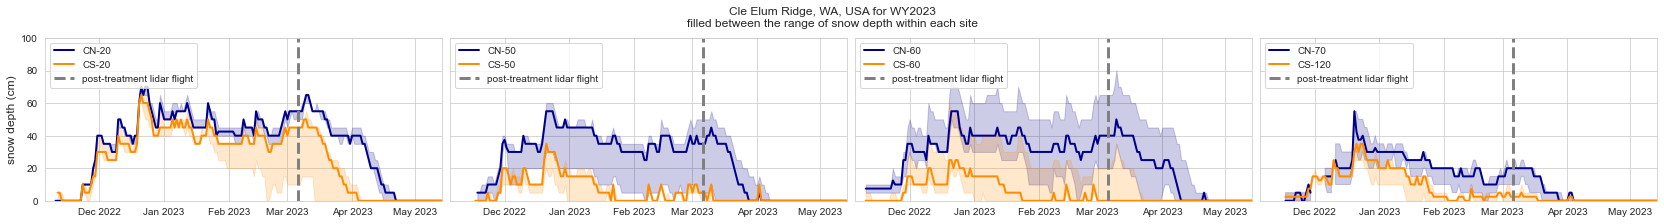

In [29]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,4,figsize = (23,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)
# ax[2].set_ylabel("snow depth (cm)", fontsize=12)
# ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

Okay, instead of plotting by BAF\
let's plot the site "openness" using the code from John.

In [12]:
#SDD_CN23
#SDD_CS23

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\2144264470.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = "Site Openness")


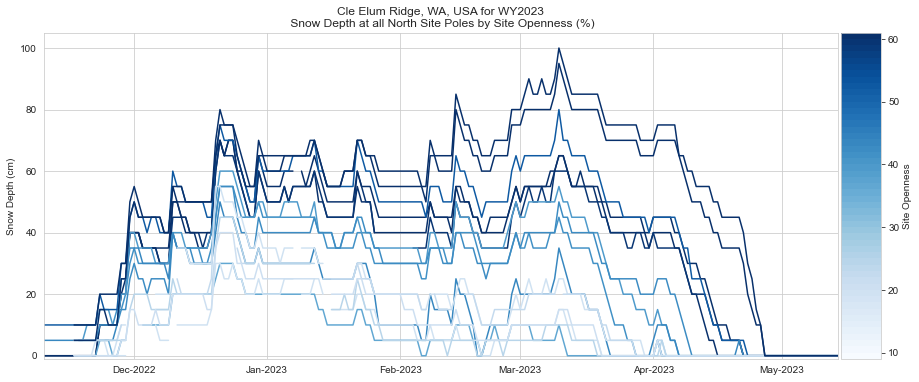

In [13]:
fig, ax = plt.subplots(figsize = (15,6))
#The following code sets up the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = "Site Openness")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax.plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax.plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax.plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax.plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax.plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax.plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax.plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax.plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax.plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax.plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax.set_ylim(-1,105)
ax.set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax.set_ylabel("Snow Depth (cm)")
ax.set_title("Cle Elum Ridge, WA, USA for WY2023\n Snow Depth at all North Site Poles by Site Openness (%)")

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\226801842.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Site Openness')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Snow Depth at Cle Elum Ridge South Sites (WY 2023)')

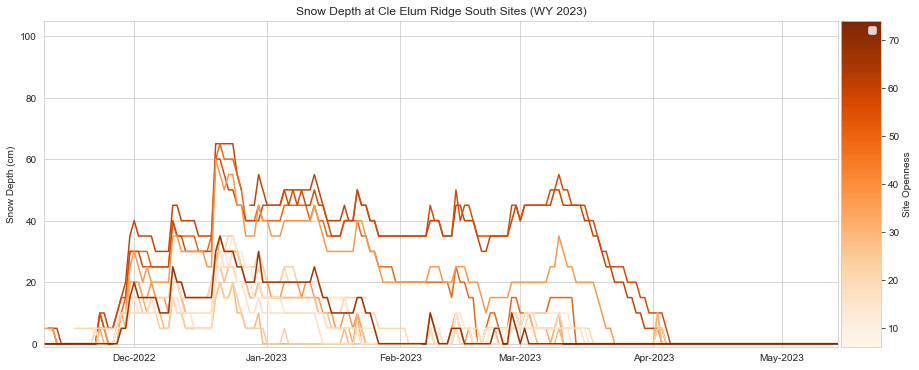

In [14]:
fig, ax = plt.subplots(figsize = (15,6))
#The following code sets up the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Site Openness')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax.plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax.plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax.plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax.plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax.plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax.plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax.plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax.plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax.plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax.plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax.set_ylim(-1,105)
ax.set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax.set_ylabel("Snow Depth (cm)")
plt.legend()
ax.set_title("Snow Depth at Cle Elum Ridge South Sites (WY 2023)")

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\2245098026.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "Gap Fraction (%)")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\2245098026.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


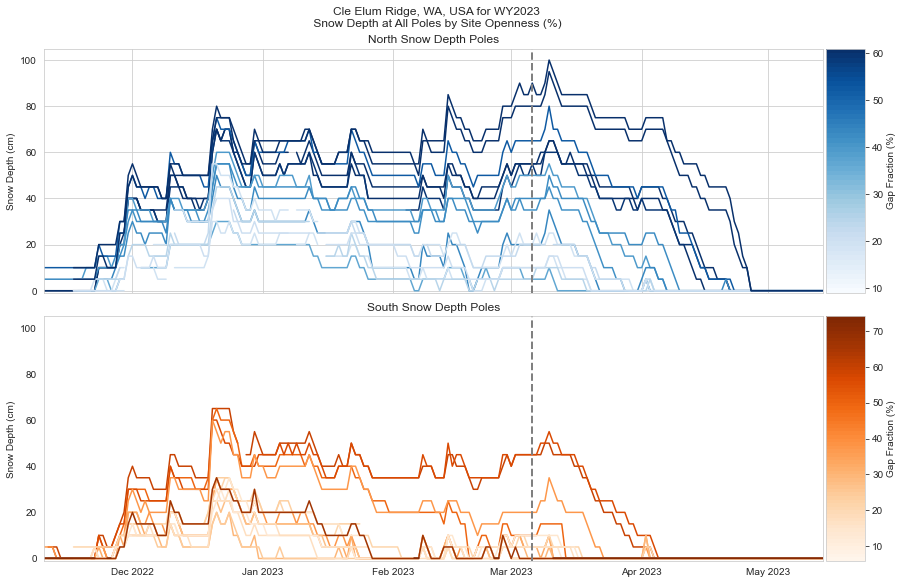

In [42]:
fig, ax = plt.subplots(2,1, figsize = (12,8), sharex=True, sharey=True, constrained_layout=True)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n Snow Depth at All Poles by Site Openness (%)")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
plt.colorbar(smn, cax = caxn, label = "Gap Fraction (%)")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("Snow Depth (cm)")
ax[0].set_title("North Snow Depth Poles")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].set_ylabel("Snow Depth (cm)")
ax[1].set_title("South Snow Depth Poles")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\3129241684.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\3129241684.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


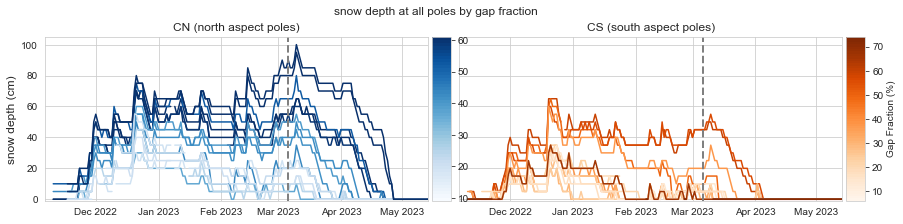

In [46]:
fig, ax = plt.subplots(1,2, figsize = (12,3), sharex=True, sharey=True, constrained_layout=True)

plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
# plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("CN (north aspect poles)")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("CS (south aspect poles)")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\3756998821.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18560\3756998821.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


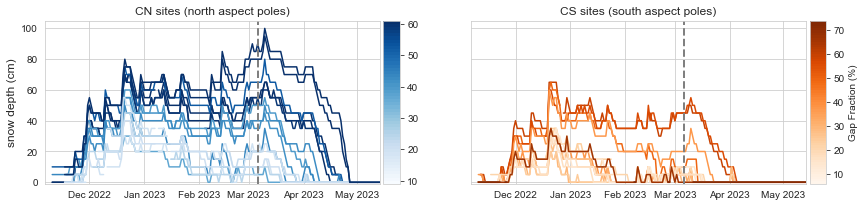

In [52]:
fig, ax = plt.subplots(1,2, figsize = (14,3), sharex=True, sharey=True)

# plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
# plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("CN sites (north aspect poles)")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("CS sites (south aspect poles)")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()